In [1]:
# Dependencies and Setup 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
from datetime import datetime
pd.options.mode.chained_assignment=None

In [2]:
crime_df = pd.read_csv("crime.csv", usecols = ['INCIDENT_ID','OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID','FIRST_OCCURRENCE_DATE','NEIGHBORHOOD_ID', 'IS_CRIME'])
print(crime_df.columns)
crime_df.head()
is_crime_df = crime_df.loc[crime_df['IS_CRIME']==1]
print(len(crime_df))
print(len(is_crime_df))
is_crime_df.head()


Index(['INCIDENT_ID', 'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID',
       'FIRST_OCCURRENCE_DATE', 'NEIGHBORHOOD_ID', 'IS_CRIME'],
      dtype='object')
534103
401178


,INCIDENT_ID,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,NEIGHBORHOOD_ID,IS_CRIME
0,2018869789,theft-other,larceny,12/27/2018 3:58:00 PM,stapleton,1
2,20176005213,theft-bicycle,larceny,6/8/2017 1:15:00 PM,union-station,1
3,20196012240,theft-from-bldg,larceny,12/7/2019 1:07:00 PM,west-colfax,1
4,2018861883,violation-of-restraining-order,all-other-crimes,12/22/2018 8:15:00 PM,montbello,1
5,2018264446,threats-to-injure,public-disorder,3/29/2018 10:00:00 AM,union-station,1


In [3]:
#split the date and time
# type(is_crime_df.iloc[0].FIRST_OCCURRENCE_DATE)

is_crime_df['Occurrence_date'] = [d.split(" ",1)[0] for d in is_crime_df['FIRST_OCCURRENCE_DATE']]
# is_crime_df['Occurrence_time'] = [d.split(" ",1)[1] for d in is_crime_df['FIRST_OCCURRENCE_DATE']]
is_crime_df.head()

,INCIDENT_ID,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,NEIGHBORHOOD_ID,IS_CRIME,Occurrence_date
0,2018869789,theft-other,larceny,12/27/2018 3:58:00 PM,stapleton,1,12/27/2018
2,20176005213,theft-bicycle,larceny,6/8/2017 1:15:00 PM,union-station,1,6/8/2017
3,20196012240,theft-from-bldg,larceny,12/7/2019 1:07:00 PM,west-colfax,1,12/7/2019
4,2018861883,violation-of-restraining-order,all-other-crimes,12/22/2018 8:15:00 PM,montbello,1,12/22/2018
5,2018264446,threats-to-injure,public-disorder,3/29/2018 10:00:00 AM,union-station,1,3/29/2018


In [4]:
is_crime_by_date = is_crime_df.groupby(['Occurrence_date', 'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID']).nunique()
is_crime_by_date.drop(['NEIGHBORHOOD_ID', 'FIRST_OCCURRENCE_DATE','IS_CRIME'], axis=1, inplace=True)

is_crime_by_date.head()
print(len(is_crime_by_date))


108611


In [5]:
#add new columns for weather data to be imported in
is_crime_by_date['tempF'] = ""
is_crime_by_date['cloudcover'] = ""
is_crime_by_date['windspeedMiles'] = ""
is_crime_by_date['precipInches'] = ""
is_crime_by_date['weatherDesc'] = ""
is_crime_by_date.head()
is_crime_by_date.to_csv("crime_cleaned.csv")

In [6]:
print(is_crime_df['Occurrence_date'].max())
print(is_crime_df['Occurrence_date'].min())

9/9/2020
1/1/2016


In [7]:
crime_by_offense_type = is_crime_df.groupby(['OFFENSE_TYPE_ID'])
offense_type_count = crime_by_offense_type['OFFENSE_TYPE_ID'].count()
len(offense_type_count)

197

In [8]:
crime_by_offense_category = is_crime_df.groupby(['OFFENSE_CATEGORY_ID'])
offense_category_count = crime_by_offense_category['OFFENSE_CATEGORY_ID'].count()
offense_category = crime_by_offense_category['OFFENSE_CATEGORY_ID']
len(offense_category)

14

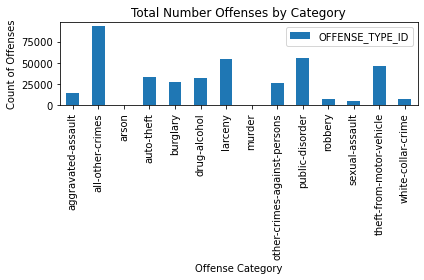

In [9]:
crime_by_offense_category_df = is_crime_df.groupby('OFFENSE_CATEGORY_ID').count().reset_index()

#crime_by_offense_category_df = crime_by_offense_category_df.rename(columns={'OFFENSE_CATEGORY_ID':'Count of Offenses'})
crime_by_offense_category_df

crime_by_offense_category_df.plot(kind='bar',x= 'OFFENSE_CATEGORY_ID',y= 'OFFENSE_TYPE_ID').legend(loc='upper right')
plt.title("Total Number Offenses by Category")
plt.xlabel("Offense Category")
plt.ylabel('Count of Offenses')
plt.tight_layout()